# Final Project - 40: Flight Passenger Satisfaction (US Airline)

### Presented by Tal Rahmany

### Group #40

#### Data source: https://www.kaggle.com/datasets/mahsataer/flight-passenger-satisfaction-us-airline
#### My GitHub: https://github.com/TalRahmany/Data-Science/tree/main/Project

<div>
<img src="https://github.com/TalRahmany/Data-Science/blob/main/Project/%D7%A0%D7%95%D7%A1%D7%A2%D7%99%D7%9D%20%D7%99%D7%95%D7%A9%D7%91%D7%99%D7%9D.png?raw=true" width="800"/>
</div>

## Checking the data and arranging columns:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/TalRahmany/Data-Science/main/Project/Airline_Passenger_Satisfaction_Test_Cleaned.csv'
Passenger_Satisfaction = pd.read_csv(url)
Passenger_Satisfaction.head()

,id,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
4,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied


In [3]:
#Passenger_Satisfaction.info()

In [4]:
Passenger_Satisfaction.isnull().sum()

id                                  0
Gender                              0
CustomerType                        0
Age                                 0
TypeOfTravel                        0
Class                               0
FlightDistance                      0
InflightWifiservice                 0
DepartureArrivalTimeCconvenient     0
EaseOfOnlineBooking                 0
GateLocation                        0
FoodAndDrink                        0
OnlineBoarding                      0
SeatComfort                         0
InflightEntertainment               0
OnBoardService                      0
LegRoomService                      0
BaggageHandling                     0
CheckinService                      0
InflightService                     0
Cleanliness                         0
DepartureDelayInMinutes             0
ArrivalDelayInMinutes              77
satisfaction                        0
dtype: int64

In [5]:
Passenger_Satisfaction['ArrivalDelayInMinutes'].fillna(Passenger_Satisfaction['ArrivalDelayInMinutes'].median(), inplace=True)
Passenger_Satisfaction.isnull().sum()

id                                 0
Gender                             0
CustomerType                       0
Age                                0
TypeOfTravel                       0
Class                              0
FlightDistance                     0
InflightWifiservice                0
DepartureArrivalTimeCconvenient    0
EaseOfOnlineBooking                0
GateLocation                       0
FoodAndDrink                       0
OnlineBoarding                     0
SeatComfort                        0
InflightEntertainment              0
OnBoardService                     0
LegRoomService                     0
BaggageHandling                    0
CheckinService                     0
InflightService                    0
Cleanliness                        0
DepartureDelayInMinutes            0
ArrivalDelayInMinutes              0
satisfaction                       0
dtype: int64

In [6]:
Passenger_Satisfaction.loc[(Passenger_Satisfaction.FlightDistance > 0),  'FDistanceGroup'] = '4000+'
Passenger_Satisfaction.loc[(Passenger_Satisfaction.FlightDistance < 4000),  'FDistanceGroup'] = '3000-3999'
Passenger_Satisfaction.loc[(Passenger_Satisfaction.FlightDistance < 3000),  'FDistanceGroup'] = '2000-2999'
Passenger_Satisfaction.loc[(Passenger_Satisfaction.FlightDistance < 2000),  'FDistanceGroup'] = '1000-1999'
Passenger_Satisfaction.loc[(Passenger_Satisfaction.FlightDistance < 1000),  'FDistanceGroup'] = '0-999'
Passenger_Satisfaction[['FlightDistance','FDistanceGroup']].head(10)

,FlightDistance,FDistanceGroup
0,160,0-999
1,2863,2000-2999
2,192,0-999
3,1182,1000-1999
4,311,0-999
5,2556,2000-2999
6,556,0-999
7,1744,1000-1999
8,1235,1000-1999
9,325,0-999


In [7]:
Passenger_Satisfaction.loc[(Passenger_Satisfaction.Age < 100),  'AgeGroup'] = '60+'
Passenger_Satisfaction.loc[(Passenger_Satisfaction.Age < 60),  'AgeGroup'] = '50-59'
Passenger_Satisfaction.loc[(Passenger_Satisfaction.Age < 50),  'AgeGroup'] = '40-49'
Passenger_Satisfaction.loc[(Passenger_Satisfaction.Age < 40),  'AgeGroup'] = '30-39'
Passenger_Satisfaction.loc[(Passenger_Satisfaction.Age < 30),  'AgeGroup'] = '19-29'
Passenger_Satisfaction.loc[(Passenger_Satisfaction.Age < 19),  'AgeGroup'] = '0-18'
Passenger_Satisfaction[['Age','AgeGroup']].head(10)

,Age,AgeGroup
0,52,50-59
1,36,30-39
2,20,19-29
3,49,40-49
4,16,0-18
5,43,40-49
6,47,40-49
7,46,40-49
8,47,40-49
9,33,30-39


## Preface: 

In [8]:
df_S =  Passenger_Satisfaction.groupby(['satisfaction'])['id' ].aggregate('count').reset_index()
df_S

,satisfaction,id
0,neutral or dissatisfied,14193
1,satisfied,10139


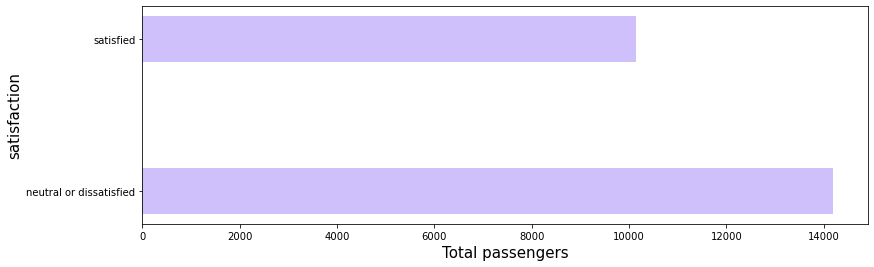

In [43]:
k=plt.barh(df_S['satisfaction'], df_S['id'], height = 0.3, color = '#cfc0fb')
plt.xlabel('Total passengers', fontsize=15)
plt.ylabel('satisfaction',fontsize=15)
plt.gcf().set_size_inches(13, 4)
plt.show()

### לפי בדיקת שביעות הרצון של חברת התעופה ניתן לראות שפחות מ-50% מהלקוחות הביעו שביעות רצון

## 1. The connection betweenbetween class type and satisfaction

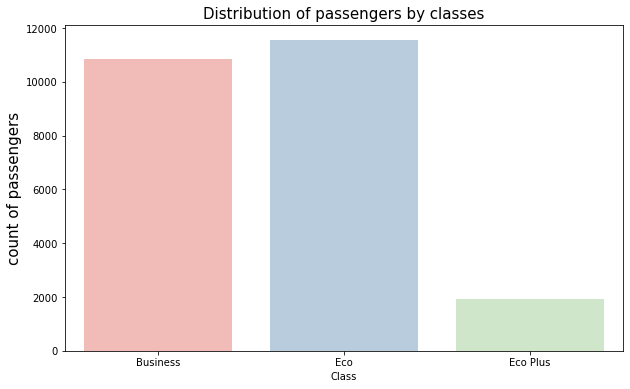

In [10]:
order = ['Business','Eco','Eco Plus']
sns.countplot(x='Class', data=Passenger_Satisfaction, order = order, palette='Pastel1')
plt.title('Distribution of passengers by classes',fontsize=15)
plt.ylabel('count of passengers',fontsize=15)
plt.gcf().set_size_inches(10, 6)
plt.show()

In [11]:
Passenger_Satisfaction.loc[(Passenger_Satisfaction.Age < 200),  'HELP_COLUMN'] = '1'

In [12]:
df_Customer=Passenger_Satisfaction.pivot_table('id', index='HELP_COLUMN', columns='Class', aggfunc='count').reset_index()
df_Customer

Class,HELP_COLUMN,Business,Eco,Eco Plus
0,1,10865,11550,1917


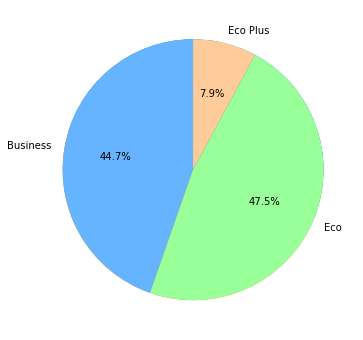

In [13]:
Customer = np.array([df_Customer['Business'].sum(),df_Customer['Eco'].sum(),df_Customer['Eco Plus'].sum()])
plt.pie(Customer)
colors = ['#66b3ff','#99ff99','#ffcc99']
plt.gcf().set_size_inches(15, 6)
val1=[df_Customer['Business'].sum(),df_Customer['Eco'].sum(),df_Customer['Eco Plus'].sum()]
mylabels = ['Business', 'Eco', 'Eco Plus']
plt.pie(val1 ,labels = mylabels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.show() 

### ניתן לראות מהגרף כי מעט מעל ה-50 אחוז טסים במחלקות התיירים 

In [14]:
class_Satisfaction =  Passenger_Satisfaction.groupby(['satisfaction','Class'])['id' ].aggregate('count').unstack().reset_index()
class_Satisfaction=class_Satisfaction.iloc[::-1]
class_Satisfaction

Class,satisfaction,Business,Eco,Eco Plus
1,satisfied,7423,2241,475
0,neutral or dissatisfied,3442,9309,1442


Text(0.5, 1.0, 'Percent of Satisfaction by departments')

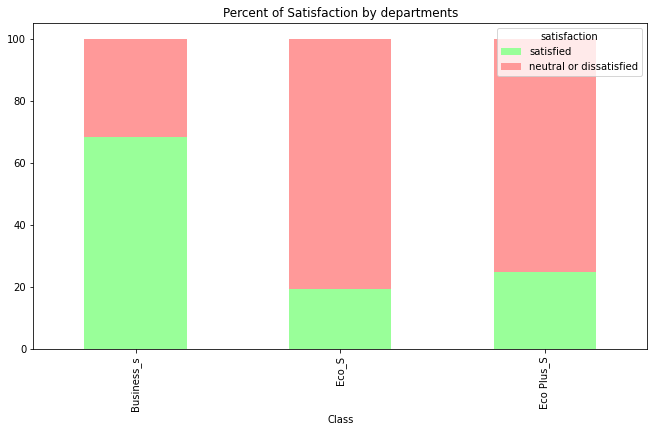

In [15]:
class_Satisfaction['Business_s'] = (class_Satisfaction['Business'] / class_Satisfaction['Business'].sum() * 100)
class_Satisfaction['Eco_S'] = (class_Satisfaction['Eco'] / class_Satisfaction['Eco'].sum() * 100)
class_Satisfaction['Eco Plus_S'] = (class_Satisfaction['Eco Plus'] / class_Satisfaction['Eco Plus'].sum() * 100)
graf = class_Satisfaction.set_index('satisfaction')[['Business_s', 'Eco_S','Eco Plus_S' ]].T.plot(kind='bar', stacked=True, color=['#99ff99','#ff9999'])
plt.gcf().set_size_inches(11, 6)
plt.title('Percent of Satisfaction by departments')

### אבל מרבית הנוסעים שטסים במחלקת התיירים והתיירים פלוס אינם מרוצים (שביעות הרצון שלהם עומדת על כ-20 אחוז)

In [16]:
Business_pas=Passenger_Satisfaction.loc[(Passenger_Satisfaction.Class=='Business')]
melted_Business_pas = pd.melt(Business_pas, id_vars=['id','satisfaction'], value_vars=['EaseOfOnlineBooking','InflightWifiservice','GateLocation', 'FoodAndDrink','OnlineBoarding','SeatComfort','InflightEntertainment','OnBoardService','LegRoomService','BaggageHandling','CheckinService','InflightService','Cleanliness'])
melted_Business_pas

Eco_pas=Passenger_Satisfaction.loc[(Passenger_Satisfaction.Class=='Eco Plus')|(Passenger_Satisfaction.Class=='Eco')]
melted_Eco_pas = pd.melt(Eco_pas, id_vars=['id','satisfaction'], value_vars=['EaseOfOnlineBooking','InflightWifiservice','GateLocation', 'FoodAndDrink','OnlineBoarding','SeatComfort','InflightEntertainment','OnBoardService','LegRoomService','BaggageHandling','CheckinService','InflightService','Cleanliness'])
melted_Eco_pas

melted_Eco_pas = melted_Eco_pas.rename(columns={'variable':'category','value':'Score'})
melted_Business_pas = melted_Business_pas.rename(columns={'variable':'category','value':'Score'})

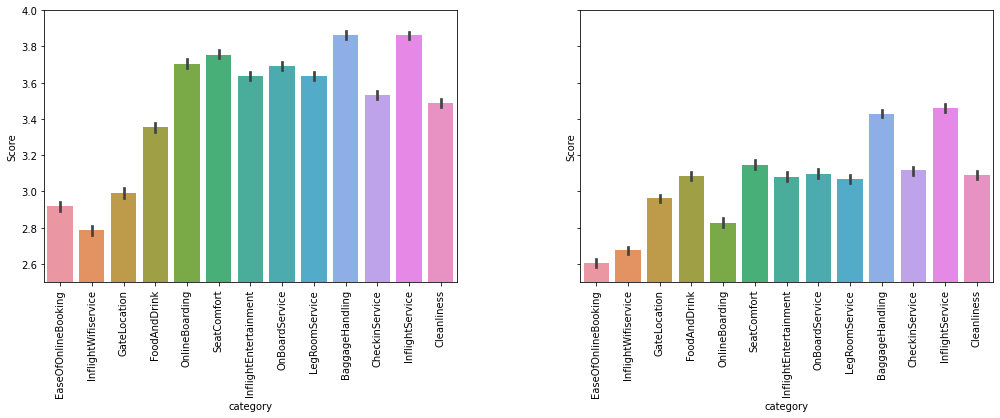

In [17]:
fig, axes = plt.subplots(figsize=(17, 5), ncols=2, sharey=True)
plt.subplots_adjust(wspace = 0.3)
ax1= sns.barplot(x='category', y='Score',data = melted_Business_pas ,ax=axes[0])
for category in ax1.get_xticklabels():
    category.set_rotation(90)
    
ax2=sns.barplot(x='category', y='Score', data = melted_Eco_pas,ax=axes[1] )
for category in ax2.get_xticklabels():
    category.set_rotation(90)
    
plt.ylim(ymax = 4, ymin =2.5)
plt.show()


### לכן ביצעתי השווה בין דירוג הקטגוריות של מחלקת תיירים ותיירים פלוס למול מחלקת ביזנס
### ניתן לראות מההשוואה שהציון הממוצע של התיירים נמוך מהציונים שניתנו בביזנס
### בחלק מן הקטגוריות התוצאה ברורה (מזון ושתיה, נוחות של הכסא ועוד) הרי הם משלמים יותר בשביל זה
### אבל יש מספר קטגוריות חריגות שאינן קשורות לתנאים במטוס: רכישת כרטיסים בקלות באינטרנט, קבלת כרטיס עלייה למטוס באינטרנט
### ? המסקנה - יש צורך לבדוק את ממשק המשתמש, האם יש שוני בין הממשק של הביזנס לעומת התיירים
### ? ואיך ניתן לשפר את הממשק על מנת לשפר את הנוחות עבור הלקוח 

## 2. Loyal Customer & Disloyal Customer

In [18]:
Type_Satisfaction =  Passenger_Satisfaction.groupby(['CustomerType','satisfaction'])['id' ].aggregate('count').unstack().reset_index()
Type_Satisfaction

satisfaction,CustomerType,neutral or dissatisfied,satisfied
0,Loyal Customer,10608,8931
1,disloyal Customer,3585,1208


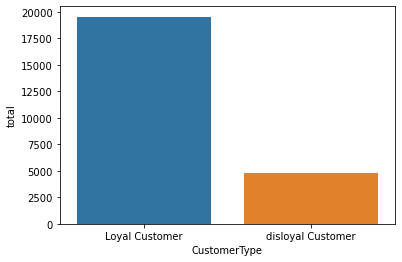

In [19]:
Type_Satisfaction1=Passenger_Satisfaction.groupby(['CustomerType','satisfaction'])['id' ].aggregate('count').unstack().reset_index()
Type_Satisfaction1['total']=Type_Satisfaction1['neutral or dissatisfied']+Type_Satisfaction1['satisfied']
Type_Satisfaction1

sns.barplot(data = Type_Satisfaction1, x='CustomerType', y='total')
#plt.xticks(rotation=90)
plt.show()


### ניתן לראות כי מרבית לקוחות החברה הם לקוחות קבועים

In [20]:
plot = Type_Satisfaction.loc[(Type_Satisfaction.CustomerType == 'Loyal Customer')]
plot2 = Type_Satisfaction.loc[(Type_Satisfaction.CustomerType == 'disloyal Customer')]


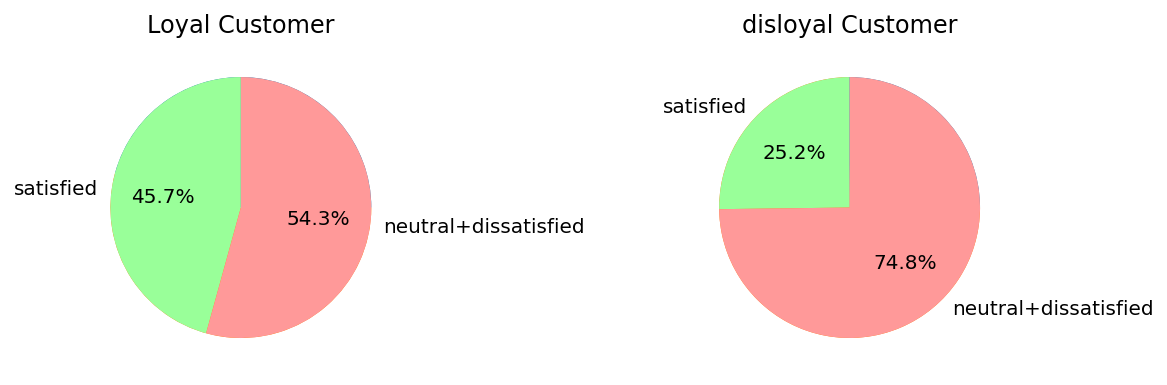

In [21]:
fig = plt.figure(figsize=(10,3),dpi=144)
ax1 = fig.add_subplot(121)

colors = ['#99ff99','#ff9999']

Loyal_Customer = np.array([plot['satisfied'].sum(),plot['neutral or dissatisfied'].sum()])
ax1.pie(Loyal_Customer)
ax1.set_title('Loyal Customer')
val1=[plot['satisfied'].sum(),plot['neutral or dissatisfied'].sum()]
mylabels = ['satisfied', 'neutral+dissatisfied']
ax1.pie(val1,labels = mylabels, autopct='%1.1f%%', startangle=90, colors=colors)


ax2 = fig.add_subplot(122)
disloyal_Customer = np.array([plot2['satisfied'].sum(),plot2['neutral or dissatisfied'].sum()])
ax2.pie(disloyal_Customer)
ax2.set_title('disloyal Customer')
val2=[plot2['satisfied'].sum(),plot2['neutral or dissatisfied'].sum()]
mylabels2 = ['satisfied', 'neutral+dissatisfied']
ax2.pie(val2,labels = mylabels2 ,autopct='%1.1f%%', startangle=90, colors=colors)

#plt.legend()
plt.show() 

### רציתי לבדוק את שביעות הרצון של הלקוחות לפי סוג הלקוחות, קבועים/לא קבועים 
### ניתן לראות בפאי כי יותר מ50% מן הלקוחות הקבועים לא שבעי רצון לכן התמקדתי בהם (הלקוחות שאנו רוצים להמשיך לשמור אצלנו) 

In [22]:
loyal_not_s= Passenger_Satisfaction.loc[(Passenger_Satisfaction.CustomerType == 'Loyal Customer')]
loyal_not_s= loyal_not_s.loc[(loyal_not_s.satisfaction == 'neutral or dissatisfied')]
line_G = loyal_not_s[['id','satisfaction','FDistanceGroup']]
line_G

,id,satisfaction,FDistanceGroup
9,115550,neutral or dissatisfied,0-999
13,22470,neutral or dissatisfied,0-999
14,124915,neutral or dissatisfied,0-999
16,76872,neutral or dissatisfied,1000-1999
18,75855,neutral or dissatisfied,1000-1999
...,...,...,...
24320,111325,neutral or dissatisfied,0-999
24321,15949,neutral or dissatisfied,0-999
24324,86816,neutral or dissatisfied,0-999
24329,37675,neutral or dissatisfied,0-999


In [23]:
line_G = line_G.groupby(['FDistanceGroup'])['id'].aggregate('count').reset_index()
line_G

,FDistanceGroup,id
0,0-999,7192
1,1000-1999,2277
2,2000-2999,1049
3,3000-3999,90


In [24]:
line_G = line_G.rename(columns={'id': 'Total passengers','FDistanceGroup': 'Flight distance'})
line_G 

,Flight distance,Total passengers
0,0-999,7192
1,1000-1999,2277
2,2000-2999,1049
3,3000-3999,90


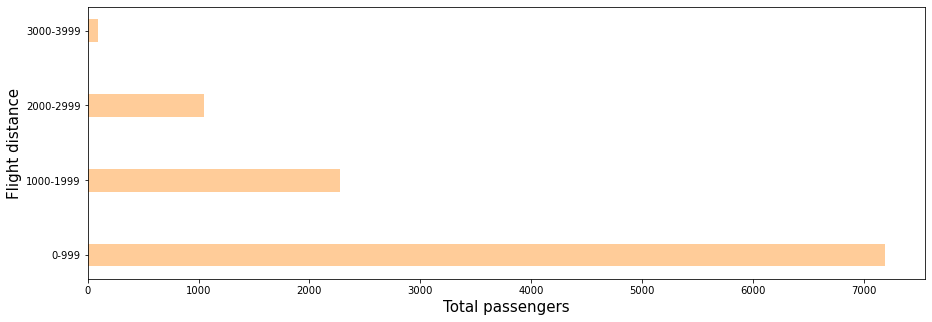

In [25]:
#F_D = line_G.plot(x='Flight distance', kind='area', stacked=False)
#plt.gcf().set_size_inches(12, 5)

k=plt.barh(line_G['Flight distance'], line_G['Total passengers'], height = 0.3, color = '#ffcc99')
plt.xlabel("Total passengers", fontsize=15)
plt.ylabel("Flight distance",fontsize=15)
plt.gcf().set_size_inches(15, 5)
plt.show()



### ניתן לראות כי מרבית מהלקוחות הקבועים שאינם מרוצים טסים בטיסות קצרות לכן התמקדתי בטיסות קצרות
 

In [26]:
loyal_not_s=loyal_not_s.loc[(loyal_not_s.FDistanceGroup == '0-999')]
loyal_not_s.head()

,id,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,...,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction,FDistanceGroup,AgeGroup,HELP_COLUMN
9,115550,Female,Loyal Customer,33,Business travel,Business,325,2,5,5,...,2,3,2,4,18,7.0,neutral or dissatisfied,0-999,30-39,1
13,22470,Male,Loyal Customer,50,Personal Travel,Eco,83,3,4,0,...,4,4,5,2,5,2.0,neutral or dissatisfied,0-999,50-59,1
14,124915,Female,Loyal Customer,31,Business travel,Eco,728,2,5,5,...,3,4,3,2,2,0.0,neutral or dissatisfied,0-999,30-39,1
19,106181,Male,Loyal Customer,55,Personal Travel,Eco,302,1,2,4,...,2,4,3,4,0,0.0,neutral or dissatisfied,0-999,50-59,1
22,7823,Male,Loyal Customer,62,Personal Travel,Eco,710,3,5,3,...,5,4,4,2,0,0.0,neutral or dissatisfied,0-999,60+,1


In [27]:
#features = ['id','EaseOfOnlineBooking','InflightWifiservice','GateLocation', 'FoodAndDrink','OnlineBoarding','SeatComfort','InflightEntertainment','OnBoardService','LegRoomService','BaggageHandling','CheckinService','InflightService','Cleanliness','DepartureDelayInMinutes','ArrivalDelayInMinutes']
#melted_loyal_not_s = pd.melt(loyal_not_s[features], id_vars = 'id', value_vars = features)


#g = sns.FacetGrid(data = melted_loyal_not_s, col='variable', col_wrap=3, sharex=False, sharey=False)
#g.map_dataframe(sns.histplot, x = "value")
#plt.show()


(0.0, 200.0)

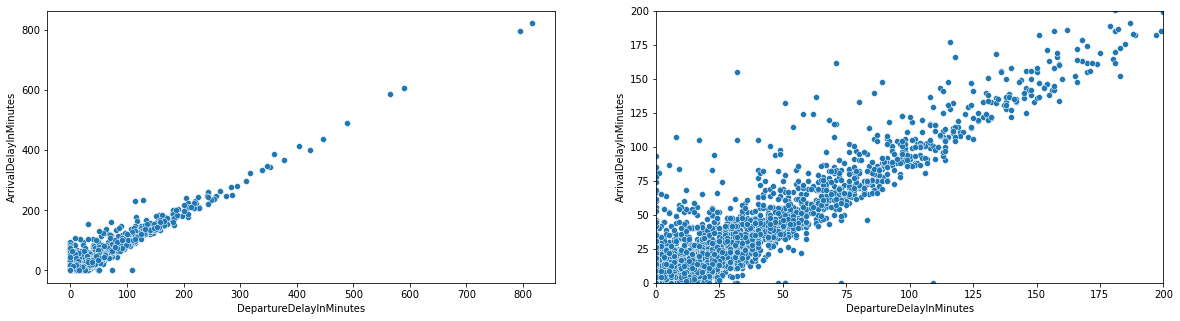

In [28]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=2)
sns.scatterplot(data = loyal_not_s, x = 'DepartureDelayInMinutes', y = 'ArrivalDelayInMinutes', ax = axes[0])
sns.scatterplot(data = loyal_not_s, x = 'DepartureDelayInMinutes', y = 'ArrivalDelayInMinutes', ax = axes[1])
plt.xlim(xmax = 200, xmin = 0)
plt.ylim(ymax = 200, ymin = 0)

In [29]:
#fig, axes = plt.subplots(figsize=(25, 5), ncols=3 ,sharey=True)

#ax1 = sns.histplot(loyal_not_s.BaggageHandling, ax = axes[0])
#ax2 =sns.histplot(loyal_not_s.InflightService, ax = axes[1])
#ax3 =sns.histplot(loyal_not_s.CheckinService, ax = axes[2])

#plt.ylim(ymax = 2450, ymin =500)

(500.0, 2450.0)

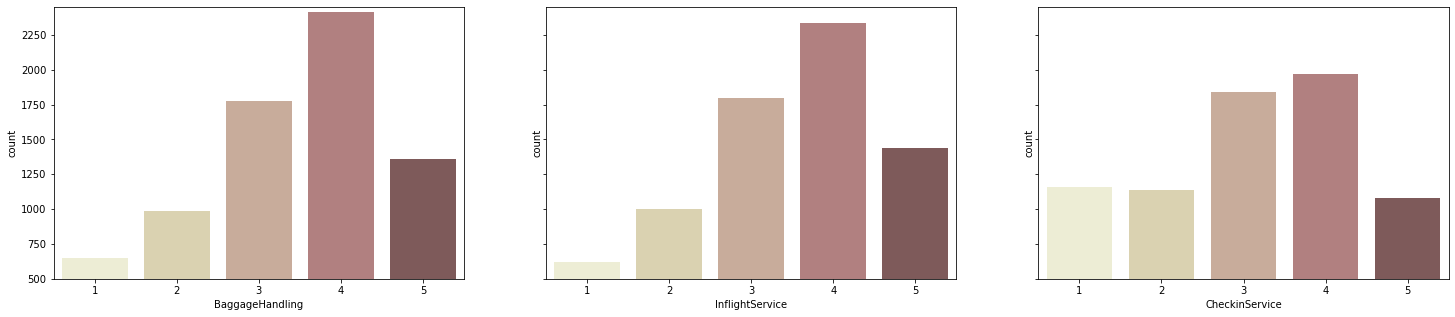

In [30]:
fig, axes = plt.subplots(figsize=(25, 5), ncols=3 ,sharey=True)

ax1 = sns.countplot(data = loyal_not_s, x = 'BaggageHandling', ax=axes[0] ,palette='pink_r')

ax2 = sns.countplot(data = loyal_not_s, x = 'InflightService', ax=axes[1] ,palette='pink_r')

ax3 = sns.countplot(data = loyal_not_s, x = 'CheckinService', ax=axes[2] ,palette='pink_r')

plt.ylim(ymax = 2450, ymin =500)


### למרות שהנוסעים המתמידים אינם מרוצים כל כך מחברת התעופה, הם ממשיכים להתמיד ולא עוברים לחברה אחרת
### לפי נתוני ההמראות ונחיתות ניתן לראות כי מרבית הטיסות של החברה יוצאות ומגיעות בזמן ובמידה ויש עיכובים לרוב הם לא יותר משעה וחצי
### כנראה שרמות הדיוק בזמינים משפיעה על הנוסעים וגורמים להם להישאר נאמנים לחברת התעופה - נקודה לשימור וחיזוק
### בנוסף ניתן לראות כי אומנם הנוסעים אינם מרוצים לחלוטין מחווית הטיסה אך בין הקריטריונים הם דירגו את רמת השירות והתפעול בצורה גבוה

## 3. Age of the Passenger

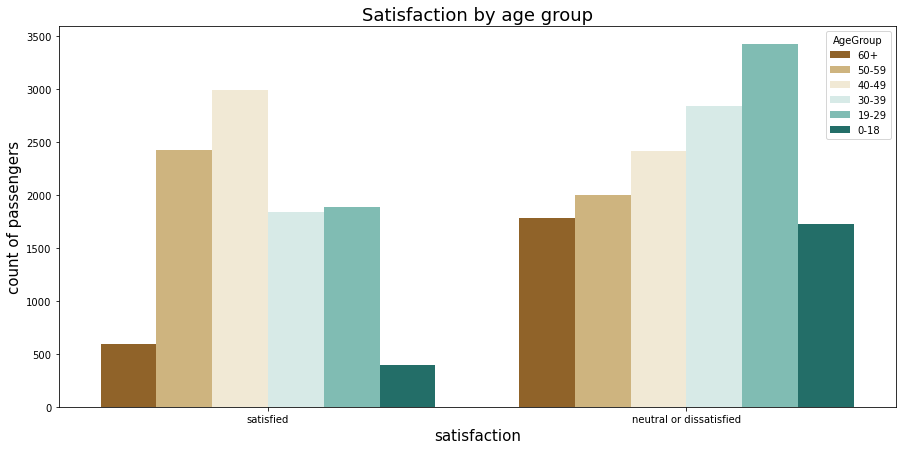

In [31]:
myorder = ['satisfied', 'neutral or dissatisfied']
order = ['60+','50-59','40-49','30-39','19-29','0-18']
sns.countplot(x='satisfaction', hue='AgeGroup',hue_order=order, data=Passenger_Satisfaction, order = myorder, palette='BrBG')
plt.title('Satisfaction by age group',fontsize=18)
plt.ylabel('count of passengers',fontsize=15)
plt.xlabel('satisfaction',fontsize=15)
plt.gcf().set_size_inches(15, 7)
plt.show()

### בגרף רואים כי מתוך ה"לא מרוצים" יש יותר נוסעים בגילאים הצעירים מאשר בגילאים המאוחרים יותר
### והרוב מהאנשים המרוצים נמצא בגילאים המבוגרים יותר
### על מנת לוודא זאת הכנתי פאי שמחלק את הגילאים ל-2 קבוצות

In [32]:
Passenger_Satisfaction.loc[(Passenger_Satisfaction.Age < 100),  'AgeGroup2'] = '40+'
Passenger_Satisfaction.loc[(Passenger_Satisfaction.Age < 40),  'AgeGroup2'] = '0-39'

Passenger_Satisfaction[['Age','AgeGroup2']].head(5)

,Age,AgeGroup2
0,52,40+
1,36,0-39
2,20,0-39
3,49,40+
4,16,0-39


In [33]:
Age_Satisfaction =  Passenger_Satisfaction.groupby(['satisfaction','AgeGroup2'])['id' ].aggregate('count').unstack().reset_index()
Age_Satisfaction

AgeGroup2,satisfaction,0-39,40+
0,neutral or dissatisfied,7989,6204
1,satisfied,4126,6013


In [34]:
p1 = Age_Satisfaction.loc[(Age_Satisfaction.satisfaction == 'satisfied')]
p2 = Age_Satisfaction.loc[(Age_Satisfaction.satisfaction == 'neutral or dissatisfied')]

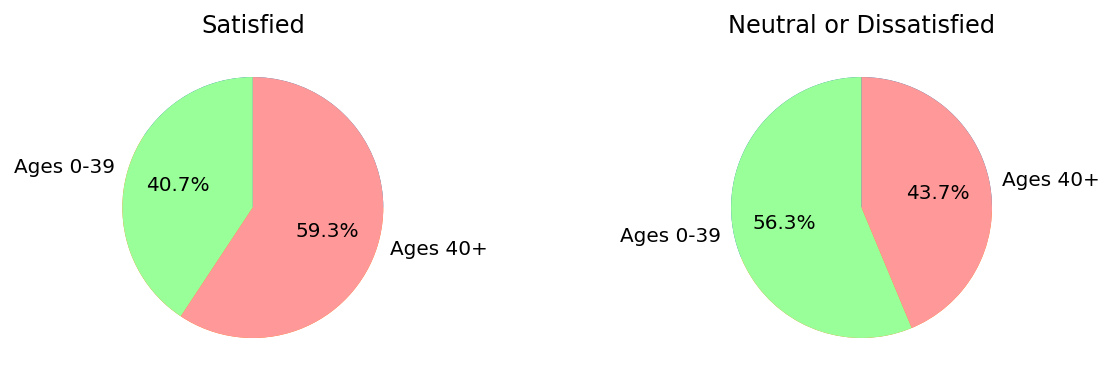

In [35]:
fig = plt.figure(figsize=(10,3),dpi=144)
colors = ['#99ff99','#ff9999']

ax1 = fig.add_subplot(121)
satisfie = np.array([p1['0-39'].sum(),p1['40+'].sum()])
ax1.pie(satisfie)
ax1.set_title('Satisfied')
val1=[p1['0-39'].sum(),p1['40+'].sum()]
mylabels = ['Ages 0-39', 'Ages 40+']
ax1.pie(val1,labels = mylabels, autopct='%1.1f%%', startangle=90, colors=colors)


ax2 = fig.add_subplot(122)
n_d = np.array([p2['0-39'].sum(),p2['40+'].sum()])
ax2.pie(n_d)
ax2.set_title('Neutral or Dissatisfied')
val2=[p2['0-39'].sum(),p2['40+'].sum()]
mylabels2 = ['Ages 0-39', 'Ages 40+']
ax2.pie(val2,labels = mylabels2 ,autopct='%1.1f%%', startangle=90, colors=colors)

#plt.legend()
plt.show() 

In [36]:
Young_n_S= Passenger_Satisfaction.loc[(Passenger_Satisfaction.AgeGroup2 == '0-39')]
Young_n_S= Young_n_S.loc[(Young_n_S.satisfaction == 'neutral or dissatisfied')]

In [37]:
#features = ['id','EaseOfOnlineBooking','InflightWifiservice','GateLocation', 'FoodAndDrink','OnlineBoarding','SeatComfort','InflightEntertainment','OnBoardService','LegRoomService','BaggageHandling','CheckinService','InflightService','Cleanliness','DepartureDelayInMinutes','ArrivalDelayInMinutes']
#melted_Young_n_S = pd.melt(Young_n_S[features], id_vars = 'id', value_vars = features)


#g1 = sns.FacetGrid(data = melted_Young_n_S, col='variable', col_wrap=3, sharex=False, sharey=False)
#g1.map_dataframe(sns.histplot, x = "value")
#plt.show()


In [38]:
#fig, axes = plt.subplots(figsize=(25, 5), ncols=3 ,sharey=True)

#ax1 = sns.histplot(Young_n_S.InflightWifiservice, ax = axes[0])
#ax2 =sns.histplot(Young_n_S.EaseOfOnlineBooking, ax = axes[1])
#ax3 =sns.histplot(Young_n_S.OnlineBoarding, ax = axes[2])

#plt.ylim(ymax = 2800, ymin =0)

(0.0, 2800.0)

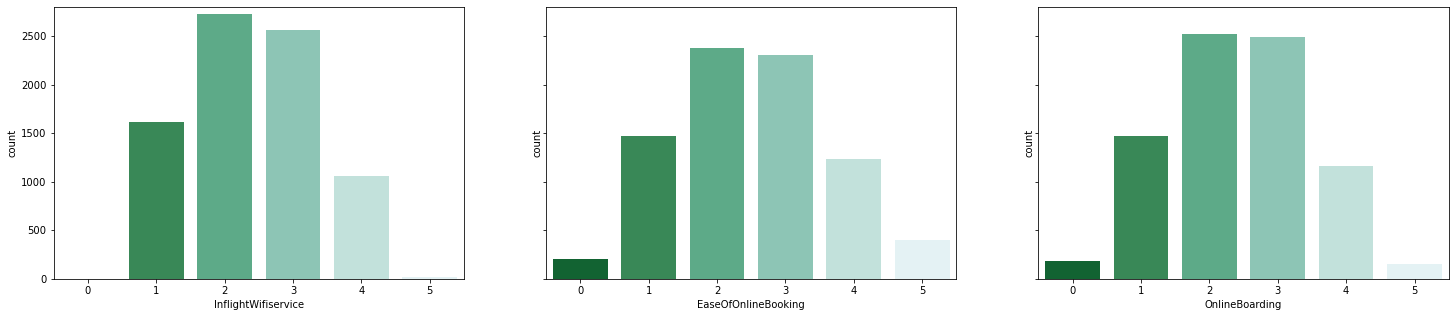

In [44]:
fig, axes = plt.subplots(figsize=(25, 5), ncols=3 ,sharey=True)

ax1 = sns.countplot(data = Young_n_S, x = 'InflightWifiservice', ax=axes[0] ,palette='BuGn_r')

ax2 = sns.countplot(data = Young_n_S, x = 'EaseOfOnlineBooking', ax=axes[1] ,palette='BuGn_r')

ax3 = sns.countplot(data = Young_n_S, x = 'OnlineBoarding', ax=axes[2] ,palette='BuGn_r')

plt.ylim(ymax = 2800, ymin =0)

### בדקתי את התפלגות הציונים בכלל הקטגוריות שנתנו הנוסעים בגילאים 0-39 (הלא מרוצים)
### ומצאתי 3 קטגוריות שהציונים בהם היו נמוכים וכמעט ולא קיבלו בהם את הציון המקסימלי
### הקטגוריות האלה הן (איכות האינטרנט במטוס, רכישת כרטיסים בקלות באינטרנט, קבלת כרטיס עלייה למטוס באינטרנט)
### ניתן לראות שהדברים שחשובים לגילאים הצעירים יותר קשורים ליכולת הגלישה באינטרנט במטוס, והשימוש באתר בביצוע פעולות 

## Scoring results by categories (all population) 

In [40]:
melted_df = pd.melt(Passenger_Satisfaction, id_vars=['id','satisfaction'], value_vars=['EaseOfOnlineBooking','InflightWifiservice','GateLocation', 'FoodAndDrink','OnlineBoarding','SeatComfort','InflightEntertainment','OnBoardService','LegRoomService','BaggageHandling','CheckinService','InflightService','Cleanliness'])
melted_df

,id,satisfaction,variable,value
0,19556,satisfied,EaseOfOnlineBooking,3
1,90035,satisfied,EaseOfOnlineBooking,3
2,12360,neutral or dissatisfied,EaseOfOnlineBooking,2
3,36875,satisfied,EaseOfOnlineBooking,4
4,39177,satisfied,EaseOfOnlineBooking,3
...,...,...,...,...
316311,78463,neutral or dissatisfied,Cleanliness,4
316312,71167,satisfied,Cleanliness,4
316313,37675,neutral or dissatisfied,Cleanliness,2
316314,90086,satisfied,Cleanliness,4


In [41]:
melted_df = melted_df.rename(columns={'variable':'category','value':'Score'})
melted_df

,id,satisfaction,category,Score
0,19556,satisfied,EaseOfOnlineBooking,3
1,90035,satisfied,EaseOfOnlineBooking,3
2,12360,neutral or dissatisfied,EaseOfOnlineBooking,2
3,36875,satisfied,EaseOfOnlineBooking,4
4,39177,satisfied,EaseOfOnlineBooking,3
...,...,...,...,...
316311,78463,neutral or dissatisfied,Cleanliness,4
316312,71167,satisfied,Cleanliness,4
316313,37675,neutral or dissatisfied,Cleanliness,2
316314,90086,satisfied,Cleanliness,4


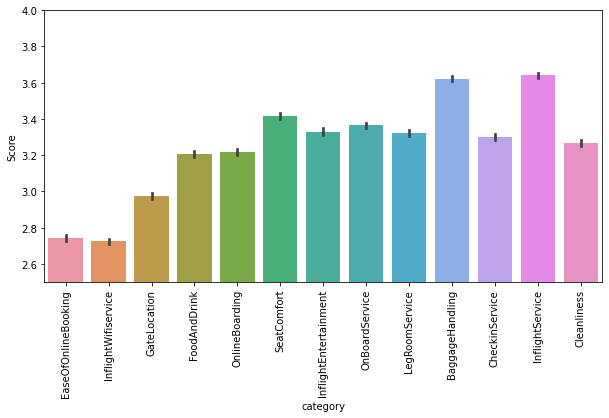

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data = melted_df, x='category', y='Score')
plt.xticks(rotation=90)
plt.ylim(ymax = 4, ymin =2.5)
plt.show()

## Conclusions

#### מחלקות במטוס  - יש צורך לבדוק את ממשק המשתמש עבור מחלקת הביזנס למול מחלקת התיירות, האם יש שוני בין הממשקים ? ואיך ניתן לשפר את הממשק על מנת לשפר את הנוחות עבור הלקוח ? (במיקוד על מחלקת תיירות)

#### מרבית מלקוחות החברה הם לקוחות קבועים - מעל 50% מהלקוחות הקבועים אינם מרוצים לחלוטין מחוויית הטיסה אך בין הקריטריונים הם דירגו את רמת השירות והתפעול בצורה גבוה 
#### ניתן גם לראות שרוב הטיסות יוצאות ללא עיכובים במידה ויש עיכוב הוא אורך לרוב עד כ-שעה וחצי, סיבה נוספת הגורמת ללקוחות להמשיך לבחור בחברת התעופה


#### קהל הלקוחות הצעיר יותר פחות מרוצה בחוויית השירות - ניתן לראות שהדברים שחשובים לגילאים הצעירים יותר קשורים ליכולת הגלישה באינטרנט במטוס, והשימוש באתר בביצוע פעולות, ולכן יש לפעול לקידום תחום זה

#### באופן כללי סוגיית השיפור של האתר והגלישה במטוס משפיע על מספר קהלי יעד 

<div>
<img src="https://github.com/TalRahmany/Data-Science/blob/main/Project/social-airline-passengers.jpeg?raw=true" width="500"/>
</div>